### Leveraging Blurred Fingerprint Images for Best Matching Score

The approach involves employing blurred fingerprint images to determine the best matching score. This concept can subsequently be applied to assess synthetically generated images.

In [30]:
import os
import cv2
import matplotlib.pyplot as plt

In [31]:
# Applying gaussian blur using opencv
def gaussian_blur(image, ksize=(5, 5), sigmaX=0):
    blurred = cv2.GaussianBlur(image, ksize, sigmaX)
    return blurred

In [32]:
test_path = "../Datasets/Sokoto Coventry Fingerprint Dataset/Real/1__M_Left_index_finger.BMP"
test = cv2.imread(test_path)

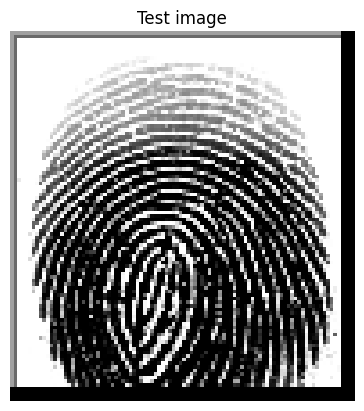

In [33]:
# Visualize the test image
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.title("Test image")
plt.axis("off")
plt.show()

In [34]:
# Applying gaussian blur to the test image
blurred_test = gaussian_blur(test)

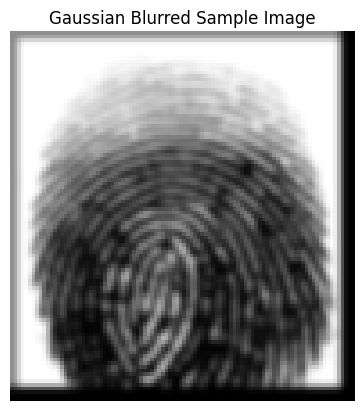

In [35]:
# Visualize the gaussian-blurred test image
plt.imshow(cv2.cvtColor(blurred_test, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Sample Image")
plt.axis("off")
plt.show()

In [36]:
# Calculating accuracy based on the number of matched keypoints and total keypoints
def calculate_accuracy(match_points, total_keypoints):
    return len(match_points) / total_keypoints * 100

In [37]:
# Calculating the best matching result
best_score = 0
best_filename = None
best_image = None
best_kp1 = None
best_kp2 = None
best_mp = None

In [38]:
# Path to Sokoto Coventry Fingerprint Dataset Real Images
real_images_dir = "../Datasets/Sokoto Coventry Fingerprint Dataset/Real"

In [39]:
# Checking through each fingerprint image from Sokoto Coventry Fingerprint Dataset
for counter, file in enumerate(os.listdir(real_images_dir)):
    if counter % 50 == 0:
        print("Processing image", counter)
    fingerprint_path = os.path.join(real_images_dir, file)
    fingerprint_img = cv2.imread(fingerprint_path)

    # Create a SIFT(Scale-Invariant Feature Transform) detector
    # The idea is to use rotation-invariant and scale invariant detector here for fingerprints.
    # Source: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints_1, des1 = sift.detectAndCompute(blurred_test, None)
    keypoints_2, des2 = sift.detectAndCompute(fingerprint_img, None)

    # Creating FLANN-based matcher for keypoint matching
    # Source: https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html
    matcher = cv2.FlannBasedMatcher({"algorithm": 1, "trees": 10}, {})
    matches = matcher.knnMatch(des1, des2, k=2)

    # Filter good matches based on Lowe's ratio test
    match_points = [p for p, q in matches if p.distance < 0.1 * q.distance]

    # Calculating a matching score as the ratio of good matches to total keypoints
    total_keypoints = min(len(keypoints_1), len(keypoints_2))
    score = calculate_accuracy(match_points, total_keypoints)

    # Updating the best score
    if score > best_score:
        best_score = score
        best_filename = file
        best_image = fingerprint_img
        best_kp1, best_kp2, best_mp = keypoints_1, keypoints_2, match_points

Processing image 0
Processing image 50
Processing image 100
Processing image 150
Processing image 200
Processing image 250
Processing image 300
Processing image 350
Processing image 400
Processing image 450
Processing image 500
Processing image 550
Processing image 600
Processing image 650
Processing image 700
Processing image 750
Processing image 800
Processing image 850
Processing image 900
Processing image 950
Processing image 1000
Processing image 1050
Processing image 1100
Processing image 1150
Processing image 1200
Processing image 1250
Processing image 1300
Processing image 1350
Processing image 1400
Processing image 1450
Processing image 1500
Processing image 1550
Processing image 1600
Processing image 1650
Processing image 1700
Processing image 1750
Processing image 1800
Processing image 1850
Processing image 1900
Processing image 1950
Processing image 2000
Processing image 2050
Processing image 2100
Processing image 2150
Processing image 2200
Processing image 2250
Processing 

In [40]:
print("Best match:", best_filename)
print("Best score:", best_score)

Best match: 1__M_Left_index_finger.BMP
Best score: 8.333333333333332


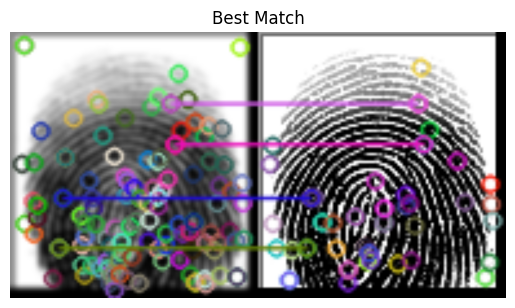

In [41]:
# Display the best match result if it exists
if best_mp:
    result = cv2.drawMatches(blurred_test, best_kp1, best_image, best_kp2, best_mp, None)
    result = cv2.resize(result, None, fx=5, fy=5)
    image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Best Match")
    plt.axis("off")
    plt.show()

In [42]:
# Save the best match result
if best_filename:
    cv2.imwrite(best_filename+"_best_match_result.jpg", image)